In [1]:
# Bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.datasets import mnist

# Metricas e ferramentas de processamento do SKLEARN

from sklearn import metrics  # Métricas adicionais para avaliação de modelos
from sklearn.model_selection import train_test_split, KFold  # Funções para dividir dados em conjuntos de treino e teste, e para validação cruzada
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report  # Métricas de avaliação de modelos de classificação
from sklearn.preprocessing import StandardScaler  # Ferramenta para pré-processamento de dados (escalonamento)
from sklearn.model_selection import cross_val_score
from sklearn.metrics import recall_score, precision_score, f1_score  # Métricas de avaliação de modelos de classificação

# Bivlioteca TensorFlow

from tensorflow.keras.models import Sequential  # Modelo de rede neural sequencial do Keras
from tensorflow.keras.layers import *  # Camadas de uma rede neural no Keras
from tensorflow.keras.callbacks import ModelCheckpoint  # Callback para salvar o modelo durante o treinamento
from tensorflow.keras.losses import MeanSquaredError  # Função de perda para regressão no Keras
from tensorflow.keras.metrics import RootMeanSquaredError  # Métrica adicional para avaliação de modelos de regressão
from tensorflow.keras.optimizers import Adam  # Otimizador Adam para treinamento de redes neurais no Keras

In [2]:
# Versão do TensorFlow utilizada.
tf.__version__

'2.17.0'

In [3]:
# Importando a biblioteca MNIST.
(X_train, y_train), (X_test, y_test) = mnist.load_data()

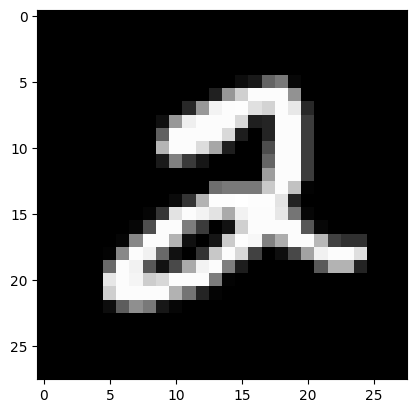

In [6]:
# Exemplo de uma imagem do Banco de dados MNIST, disposta em uma matriz 28x28.
plt.imshow(X_train[5],cmap='gray')

In [11]:
# Transformando a matriz 28x28 em um vetor coluna de 784x1.
X_train = X_train.reshape(-1, 28*28)
X_test = X_test.reshape(-1, 28*28)
X_train[1].shape

(784,)

In [9]:
# Normalizando o banco de dados por escalonamento por valor máximo.
X_train = X_train / 255.0
X_test = X_test / 255.0

In [12]:
# Criando um modelo sequencial
model = tf.keras.models.Sequential()

# Criando a camada de entrada de 784 neurônios e a 1º camada oculta com 128 neurônios (Função de ativação Relu).
model.add(tf.keras.layers.Dense(units=128, activation='relu', input_shape=(784, )))

#Função Dropout
model.add(tf.keras.layers.Dropout(0.2))

# 2º camada oculta com 100 neurônios
model.add(tf.keras.layers.Dense(units=100, activation='relu'))

# Função Dropout
model.add(tf.keras.layers.Dropout(0.2))

# 3º camada oculta com 64 neurônios
model.add(tf.keras.layers.Dense(units=64, activation='relu'))

# Função Dropout
model.add(tf.keras.layers.Dropout(0.2))

# Criando a camada de saída com 10 neurônios e função de ativação softmax
model.add(tf.keras.layers.Dense(units=10, activation='softmax'))

c:\Users\Micael\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
# Compilando o modelo
cp1 = ModelCheckpoint('model/melhor_modelo.keras', save_best_only=True)
model.compile(loss = 'sparse_categorical_crossentropy' , optimizer = Adam(learning_rate=0.001), metrics = ['sparse_categorical_accuracy'])

In [14]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        12,900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         6,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 120,494 (470.68 KB)

 Trainable params: 120,494 (470.68 KB)

 Non-trainable params: 0 (0.00 B)

In [15]:
# Treinando e validando o modelo Neural com 40 épocas de treinamento
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=40, callbacks=[cp1])

Epoch 1/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.6035 - sparse_categorical_accuracy: 0.8106 - val_loss: 0.1416 - val_sparse_categorical_accuracy: 0.9574
Epoch 2/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.1861 - sparse_categorical_accuracy: 0.9450 - val_loss: 0.1068 - val_sparse_categorical_accuracy: 0.9685
Epoch 3/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.1385 - sparse_categorical_accuracy: 0.9606 - val_loss: 0.0930 - val_sparse_categorical_accuracy: 0.9738
Epoch 4/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.1177 - sparse_categorical_accuracy: 0.9640 - val_loss: 0.0976 - val_sparse_categorical_accuracy: 0.9732
Epoch 5/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.1017 - sparse_categorical_accuracy: 0.9703 - val_loss: 0.0818 - val_sparse_categorical_accuracy: 0.9753
Epoch 6/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0899 - sparse_categorical_accuracy: 0.9732 - val_loss: 0.0879 - val_sparse_categorical_accuracy:

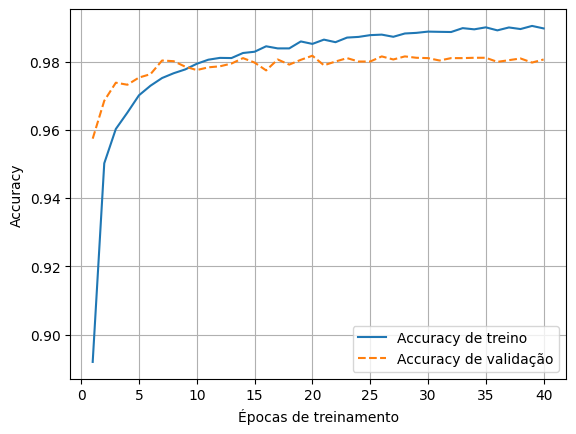

In [16]:
# Obtendo a acurácia do histórico
accuracy = history.history['sparse_categorical_accuracy']
val_accuracy = history.history['val_sparse_categorical_accuracy']

# Obtendo as épocas
epochs = range(1, len(accuracy) + 1)

# Plotando a acurácia
plt.plot(epochs, accuracy, '-', label='Accuracy de treino')
plt.plot(epochs, val_accuracy, '--', label='Accuracy de validação')
#plt.title('')
plt.xlabel('Épocas de treinamento')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

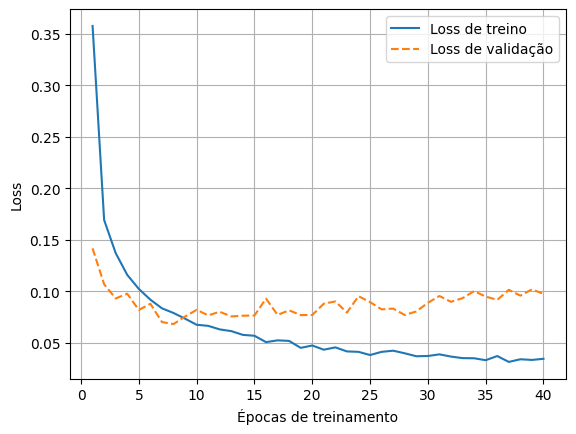

In [17]:
# Obtendo a loss do histórico
loss = history.history['loss']
val_loss = history.history['val_loss']

# Obtendo as épocas
epochs = range(1, len(accuracy) + 1)

# Plotando a acurácia
plt.plot(epochs, loss, '-', label='Loss de treino')
plt.plot(epochs, val_loss, '--', label='Loss de validação')
#plt.title('')
plt.xlabel('Épocas de treinamento')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

In [18]:
# Testando o modelo
test_loss, test_accuracy = model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1258 - sparse_categorical_accuracy: 0.9758


In [19]:
# Obtém as previsões do modelo para os dados de teste
y_pred = model.predict(X_test)

# Converte as previsões para rótulos binários (0 ou 1) para cada classe individualmente
y_pred_binary = np.argmax(y_pred, axis=1)

# Calcula o recall para cada classe individualmente
recall_per_class = recall_score(y_test, y_pred_binary, average=None)

# Calcula a precisão para cada classe individualmente
precision_per_class = precision_score(y_test, y_pred_binary, average=None)

# Calcula o F-score para cada classe individualmente
f_score_per_class = f1_score(y_test, y_pred_binary, average=None)

# Calcula a média ponderada dos recalls
weighted_recall = recall_score(y_test, y_pred_binary, average='weighted')

# Calcula a média ponderada da precisão
weighted_precision = precision_score(y_test, y_pred_binary, average='weighted')

# Calcula a média ponderada do F-score
weighted_f_score = f1_score(y_test, y_pred_binary, average='weighted')

# Imprime a Accuracy
print("Accuracy: {:.4f}".format(test_accuracy))

# Imprime a média ponderada da precisão
print("Weighted Precision: {:.4f}".format(weighted_precision))

# Imprime a média ponderada do F-score
print("Weighted F-score: {:.4f}".format(weighted_f_score))

# Imprime a média ponderada dos recalls
print("Weighted Recall: {:.4f}".format(weighted_recall))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Accuracy: 0.9806
Weighted Precision: 0.9806
Weighted F-score: 0.9806
Weighted Recall: 0.9806
